In [20]:
from src.nx_hif import *
from src.nx_hif.hif import *
from src.nx_hif.test_dpo import *
import networkx as nx

def inet_draw(inet):
    inet = nx.MultiDiGraph(inet)
    inet.remove_nodes_from(list(nx.isolates(inet)))
    # https://docs.rapids.ai/api/cugraph/stable/api_docs/api/cugraph/cugraph.force_atlas2/
    # note that this layout can be run on the GPU with nx-cugraph
    pos = nx.drawing.layout.forceatlas2_layout(inet)
    nx.draw_networkx(
        inet,
        pos=pos,
        labels={
            n: inet.nodes[n].get("tag", "") for n in inet.nodes},
        node_size=[
            10 if inet.nodes[n]["bipartite"] == 0
            else 300 for n in inet.nodes],
        node_color=[
            "blue" if inet.nodes[n]["bipartite"] == 0
            else "green" for n in inet.nodes],
        connectionstyle=["arc3,rad=-0.00", "arc3,rad=0.3"],
        )


inet = inet_franchu()

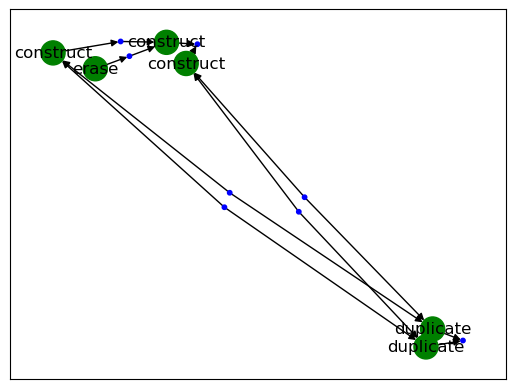

In [21]:
C = read_apply_rule(inet, "data/inet/condup")
inet_draw(C)

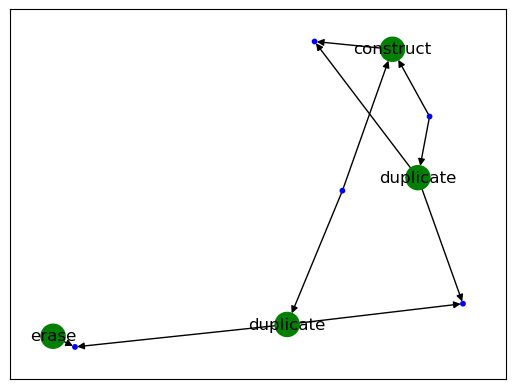

In [22]:
C = read_apply_rule(C, "data/inet/concon")
inet_draw(C)

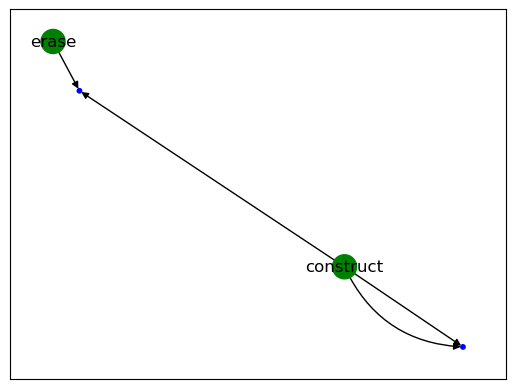

In [23]:
C = read_apply_rule(C, "data/inet/dupdup")
inet_draw(C)

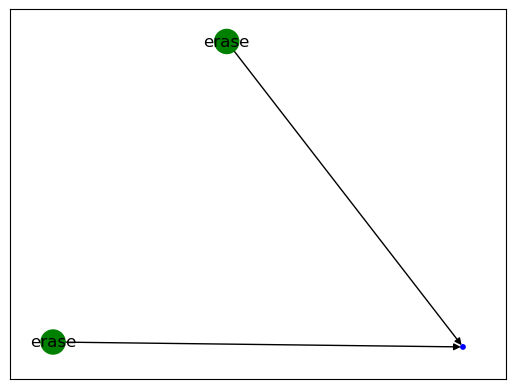

In [24]:
C = read_apply_rule(C, "data/inet/eracon")
inet_draw(C)

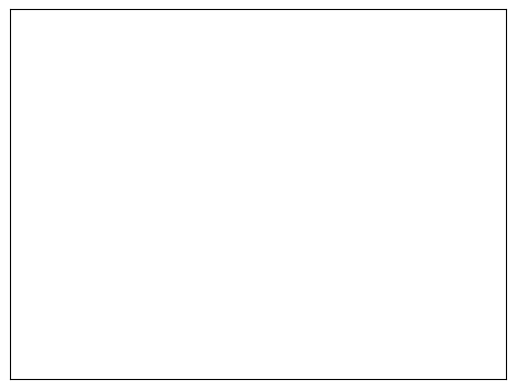

In [25]:
C = read_apply_rule(C, "data/inet/eraera")
inet_draw(C)